In [ ]:
import numpy as np
import pandas as pd
! pip install sidetable
import sidetable
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.3 MB/s eta 0:00:00


In [ ]:


# Load data using the modified Google Drive link
df = pd.read_csv('https://drive.google.com/uc?id=1d-Zs0gl5nVptGC578KSp1L2ooyxUmh1M')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1kPESKWEdAWQ7KIb3LQPNjpYsvOWOicNAHZuzd_vT0RA#gid=0


In [ ]:
# Check target balance for main variables
for col in ['CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'PricingStrategy']:
    print(f"Target balance for {col}:")
    print(df.groupby(col)['FraudResult'].value_counts(normalize=True) * 100)
    print("-" * 20)

Target balance for CurrencyCode:
CurrencyCode  FraudResult
UGX           0              99.798248
              1               0.201752
Name: proportion, dtype: float64
--------------------
Target balance for CountryCode:
CountryCode  FraudResult
256          0              99.798248
             1               0.201752
Name: proportion, dtype: float64
--------------------
Target balance for ProviderId:
ProviderId    FraudResult
ProviderId_1  0               98.989899
              1                1.010101
ProviderId_2  0              100.000000
ProviderId_3  0               97.924773
              1                2.075227
ProviderId_4  0               99.986907
              1                0.013093
ProviderId_5  0               99.559895
              1                0.440105
ProviderId_6  0               99.991224
              1                0.008776
Name: proportion, dtype: float64
--------------------
Target balance for ProductId:
ProductId     FraudResult
ProductId_1   0

In [ ]:
# Check the target balance for 'FraudResult'
print(df['FraudResult'].value_counts())

FraudResult
0    95469
1      193
Name: count, dtype: int64


## Explanation of Variables


1. **TransactionId**: Unique transaction identifier on the platform.

2. **BatchId**: Unique number assigned to a batch of transactions for processing.

3. **AccountId**: Unique number identifying the customer on the platform.

4. **SubscriptionId**: Unique number identifying the customer subscription.

5. **CustomerId**: Unique identifier attached to the account.

6. **CurrencyCode**: Country currency in which the transaction is processed.

7. **CountryCode**: Numerical geographical code of the country.

8. **ProviderId**: Source provider of the item bought.

9. **ProductId**: Item name being bought.

10. **ProductCategory**: Broader categories into which ProductIds are organized.

11. **ChannelId**: Identifies if the customer used web, Android, iOS, pay later, or checkout.

12. **Amount**: Value of the transaction. Positive for debits from customer account and negative for credits into customer account.

13. **Value**: Absolute value of the transaction amount.

14. **TransactionStartTime**: Transaction start time.

15. **PricingStrategy**: Category of Xente's pricing structure for merchants.

16. **FraudResult**: Fraud status of the transaction (1 for yes, 0 for no).




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [ ]:
# check target balance (BAD)
df.stb.freq(['BAD'], style = True)

,BAD,count,percent,cumulative_count,cumulative_percent
0,0,"4,771",80.05%,"4,771",80.05%
1,1,"1,189",19.95%,"5,960",100.00%


In [ ]:
# Check numeric variables
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [ ]:
# missing check
df.stb.missing()

,missing,total,percent
TransactionId,0,95662,0.0
BatchId,0,95662,0.0
AccountId,0,95662,0.0
SubscriptionId,0,95662,0.0
CustomerId,0,95662,0.0
CurrencyCode,0,95662,0.0
CountryCode,0,95662,0.0
ProviderId,0,95662,0.0
ProductId,0,95662,0.0
ProductCategory,0,95662,0.0


### Unvariate analysis


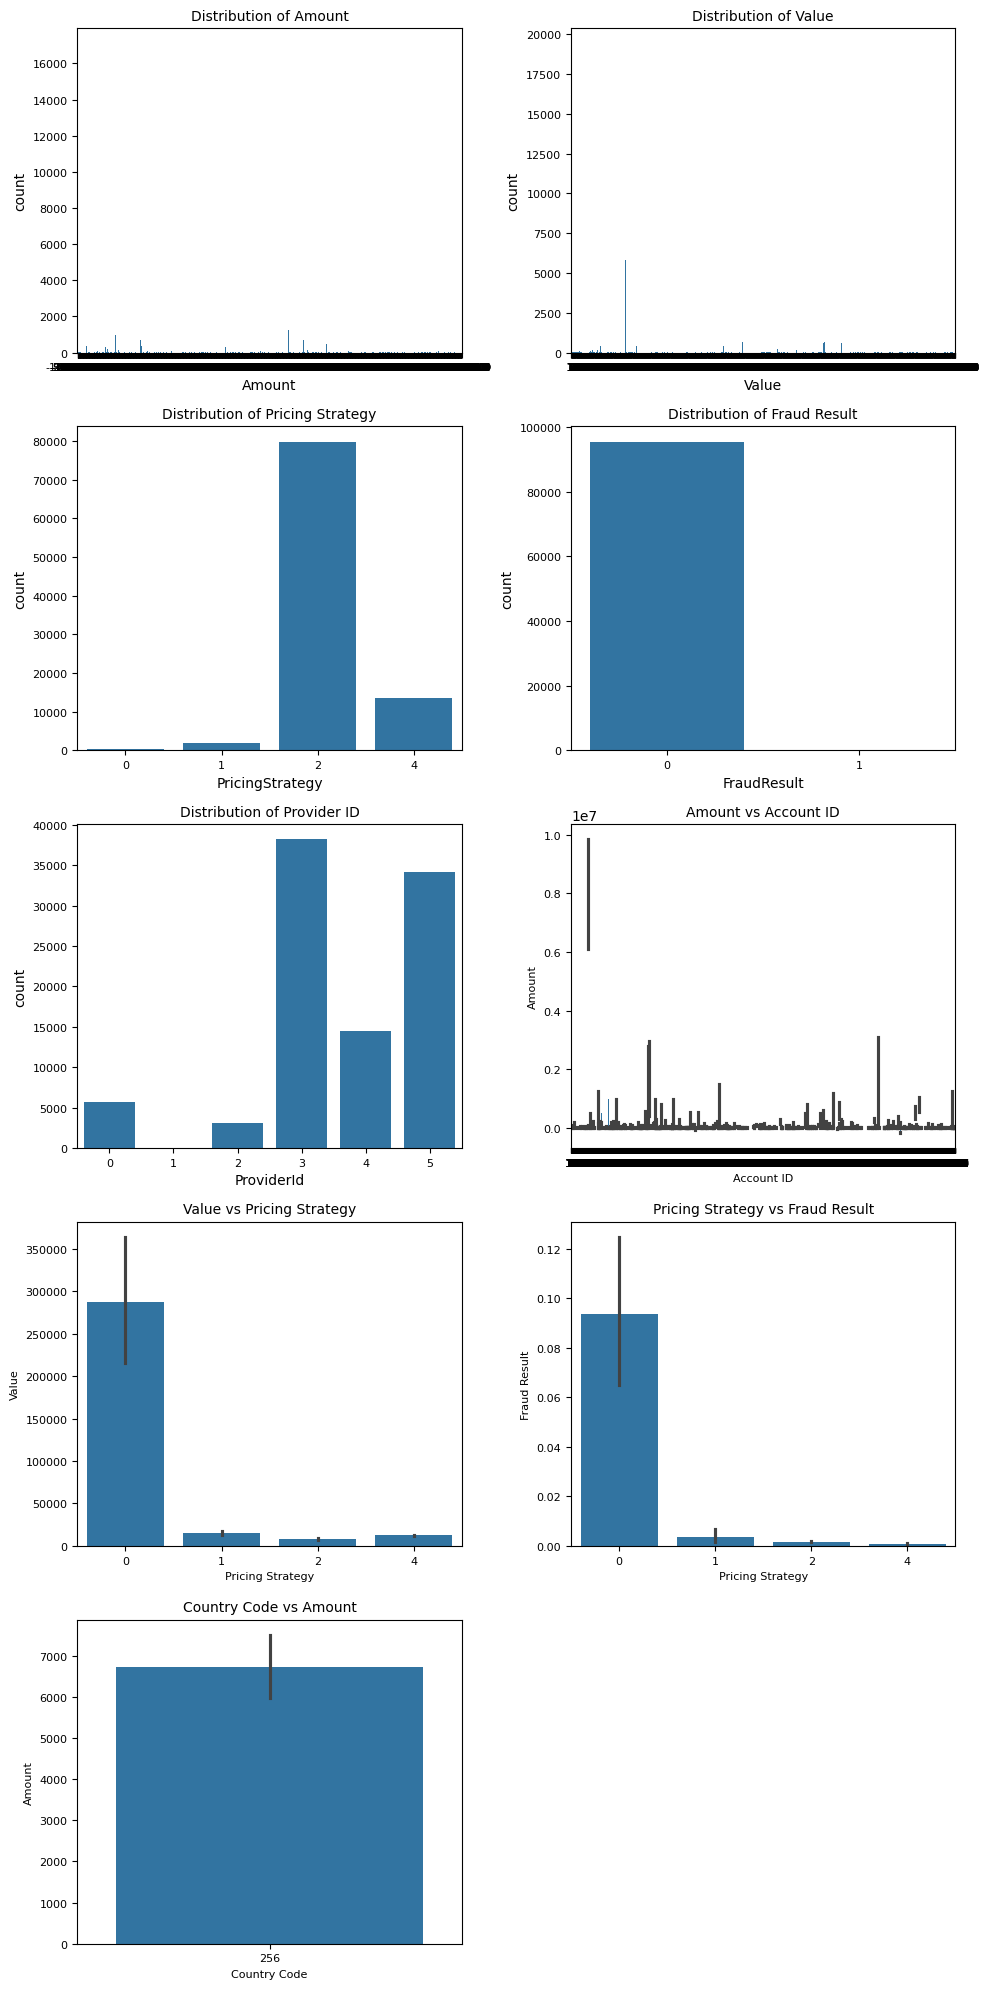

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create bar plots in a grid
def create_bar_plot_grid(data, plots_data, n_cols=2):
    """
    Creates a grid of bar plots using Seaborn.

    Args:
        data: DataFrame containing the data.
        plots_data: A list of dictionaries, each containing plot specifications.
        n_cols: Number of columns in the grid.
    """
    n_plots = len(plots_data)
    n_rows = (n_plots + n_cols - 1) // n_cols  # Calculate number of rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 4))  # Adjust figsize as needed
    axes = axes.flatten()  # Flatten the axes array for easier indexing

    for i, plot_data in enumerate(plots_data):
        ax = axes[i]
        x_col = plot_data['x_col']
        y_col = plot_data.get('y_col')  # Use get() to handle optional y_col
        title = plot_data.get('title')
        xlabel = plot_data.get('xlabel')
        ylabel = plot_data.get('ylabel')
        rotation = plot_data.get('rotation')

        if y_col:
            sns.barplot(x=x_col, y=y_col, data=data, ax=ax)
        else:
            sns.countplot(x=x_col, data=data, ax=ax)

        if title:
            ax.set_title(title, fontsize=10)  # Reduce title font size
        if xlabel:
            ax.set_xlabel(xlabel, fontsize=8)  # Reduce xlabel font size
        if ylabel:
            ax.set_ylabel(ylabel, fontsize=8)  # Reduce ylabel font size
        if rotation:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, fontsize=8)  # Reduce xticklabels font size

        ax.tick_params(axis='both', which='major', labelsize=8)  # Reduce tick label size

    # Hide any unused subplots
    for i in range(n_plots, n_rows * n_cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Define plot specifications
plots_data = [
    {'x_col': 'Amount', 'title': 'Distribution of Amount'},
    {'x_col': 'Value', 'title': 'Distribution of Value'},
    {'x_col': 'PricingStrategy', 'title': 'Distribution of Pricing Strategy'},
    {'x_col': 'FraudResult', 'title': 'Distribution of Fraud Result'},
    {'x_col': 'ProviderId', 'title': 'Distribution of Provider ID'},
    {'x_col': 'AccountId', 'y_col': 'Amount', 'title': 'Amount vs Account ID', 'xlabel': 'Account ID', 'ylabel': 'Amount'},
    {'x_col': 'PricingStrategy', 'y_col': 'Value', 'title': 'Value vs Pricing Strategy', 'xlabel': 'Pricing Strategy', 'ylabel': 'Value'},
    {'x_col': 'PricingStrategy', 'y_col': 'FraudResult', 'title': 'Pricing Strategy vs Fraud Result', 'xlabel': 'Pricing Strategy', 'ylabel': 'Fraud Result'},
    {'x_col': 'CountryCode', 'y_col': 'Amount', 'title': 'Country Code vs Amount', 'xlabel': 'Country Code', 'ylabel': 'Amount'}
]

# Create the grid of bar plots
create_bar_plot_grid(df, plots_data)

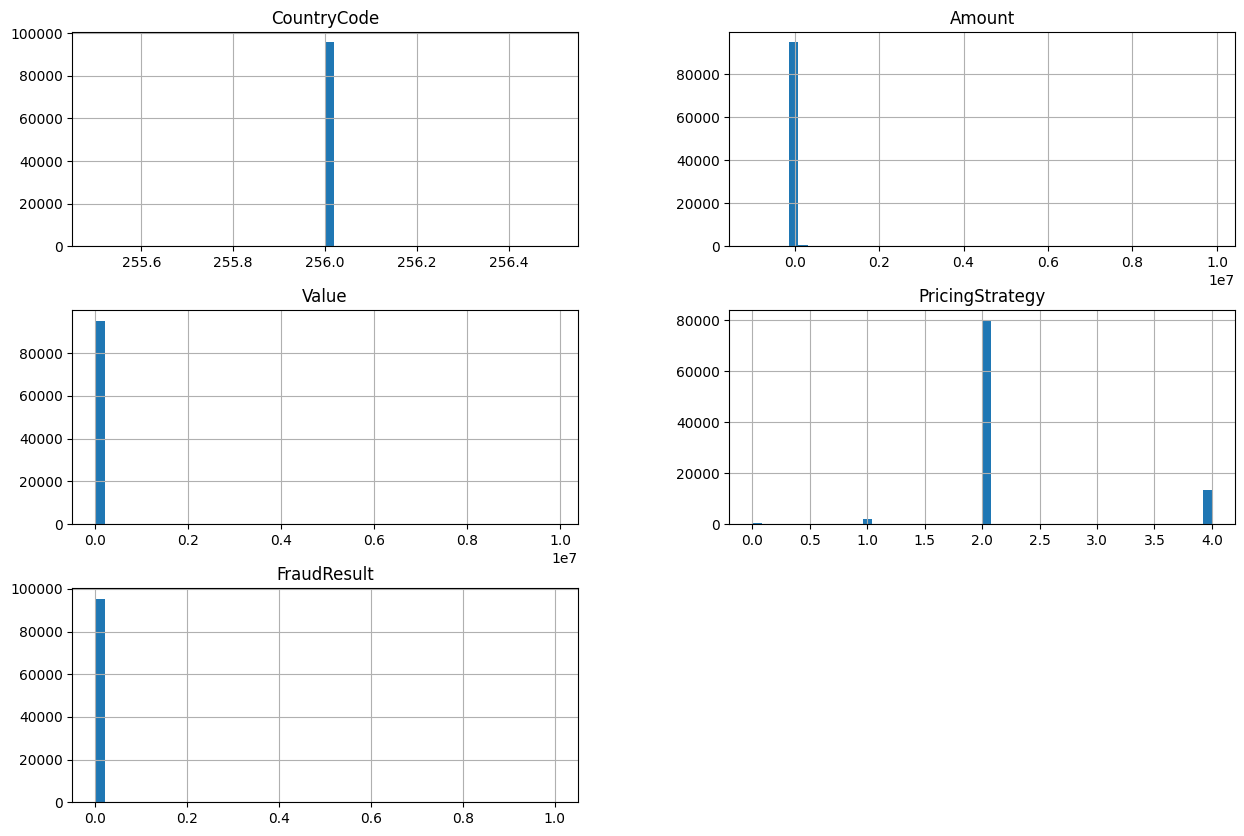

In [ ]:
# distribution plots - Histograms
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize = (15, 10), bins = 50);

### Missing input

In [ ]:
column_names_list = df.columns.tolist()
print(column_names_list)

['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult', 'TransactionMonth', 'TransactionDay', 'TransactionHour', 'TransactionMinute', 'TransactionSecond', 'Amount_by_Account', 'Value_by_Account', 'Amount_Rolling_Mean']


In [ ]:
!pip install scorecardpy
import scorecardpy as sc # import scorecardpy


# Split the DataFrame into train and test sets
train, test = sc.split_df(df, y='FraudResult',
                         ratio=0.7, seed=999).values()


train = train.rename(columns={'FraudResult': 'BAD'})


bins = sc.woebin(train, y='BAD', x=['ProductCategory', 'ChannelId'],
                 save_breaks_list='cat_breaks')

[INFO] creating woe binning ...


/usr/local/lib/python3.11/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.11/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.11/dist-packages/scorecardpy/woebin.py:320: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fals

[INFO] The breaks_list is saved as cat_breaks_20250130_090929.py


/usr/local/lib/python3.11/dist-packages/scorecardpy/woebin.py:413: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['variable', 'bstbin', 'value'], group_keys=False)\
/usr/local/lib/python3.11/dist-packages/scorecardpy/woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .agg({'good':sum, 'bad':sum}).reset_index()\
/usr/local/lib/python3.11/dist-packages/scorecardpy/woebin.py:414: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" 

In [ ]:
df.stb.freq(['Value'], style = True)

,Value,count,percent,cumulative_count,cumulative_percent
0,1000,"19,407",20.29%,"19,407",20.29%
1,5000,"9,376",9.80%,"28,783",30.09%
2,50,"8,526",8.91%,"37,309",39.00%
3,10000,"7,944",8.30%,"45,253",47.31%
4,500,"5,807",6.07%,"51,060",53.38%
5,2000,"5,763",6.02%,"56,823",59.40%
6,20,"2,615",2.73%,"59,438",62.13%
7,100,"2,422",2.53%,"61,860",64.67%
8,25000,"2,070",2.16%,"63,930",66.83%
9,25,"2,008",2.10%,"65,938",68.93%


In [ ]:
# Reason
## We fill missing values with the most frequent value ('DebtCon')
df['REASON'] = df['REASON'].fillna('DebtCon')

In [ ]:
df.stb.freq(['Amount'], style = True)

,Amount,count,percent,cumulative_count,cumulative_percent
0,1000.000000,"17,091",17.87%,"17,091",17.87%
1,-50.000000,"8,513",8.90%,"25,604",26.77%
2,10000.000000,"8,260",8.63%,"33,864",35.40%
3,2000.000000,"5,489",5.74%,"39,353",41.14%
4,500.000000,"5,246",5.48%,"44,599",46.62%
5,-5000.000000,"5,110",5.34%,"49,709",51.96%
6,5000.000000,"4,595",4.80%,"54,304",56.77%
7,-20.000000,"2,608",2.73%,"56,912",59.49%
8,-100.000000,"2,405",2.51%,"59,317",62.01%
9,-1000.000000,"2,345",2.45%,"61,662",64.46%


In [ ]:
df.stb.freq(['FraudResult'], style = True)

,FraudResult,count,percent,cumulative_count,cumulative_percent
0,0,"95,469",99.80%,"95,469",99.80%
1,1,193,0.20%,"95,662",100.00%


In [ ]:
# Numeric variables - impute missings with their median
df['Amount'] = df['Amount'].fillna(df['Amount'].median())
df['Value'] = df['Value'].fillna(df['Value'].median())
df['Amount_by_Account'] = df['Amount_by_Account'].fillna(df['Amount_by_Account'].median())
df['Value_by_Account'] = df['Value_by_Account'].fillna(df['Value_by_Account'].median())
df['Amount_Rolling_Mean'] = df['Amount_Rolling_Mean'].fillna(df['Amount_Rolling_Mean'].median())
#The remaining columns 'TransactionMonth', 'TransactionDay', 'TransactionHour', 'TransactionMinute', 'TransactionSecond'
# are likely integers and if they have missing values, you can impute them similarly.
df['TransactionMonth'] = df['TransactionMonth'].fillna(df['TransactionMonth'].median())
df['TransactionDay'] = df['TransactionDay'].fillna(df['TransactionDay'].median())
df['TransactionHour'] = df['TransactionHour'].fillna(df['TransactionHour'].median())
df['TransactionMinute'] = df['TransactionMinute'].fillna(df['TransactionMinute'].median())
df['TransactionSecond'] = df['TransactionSecond'].fillna(df['TransactionSecond'].median())

In [ ]:
# missing check
df.stb.missing()

,missing,total,percent
TransactionId,0,95662,0.0
BatchId,0,95662,0.0
Value_by_Account,0,95662,0.0
Amount_by_Account,0,95662,0.0
TransactionSecond,0,95662,0.0
TransactionMinute,0,95662,0.0
TransactionHour,0,95662,0.0
TransactionDay,0,95662,0.0
TransactionMonth,0,95662,0.0
FraudResult,0,95662,0.0


## Bivariate Analysis


In [ ]:
# Selecting only numeric variables
numeric_df = df.select_dtypes(include=['number'])

In [ ]:
numeric_df.corr()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000000,-0.075099,-0.046186,-0.036492,-0.053956,0.269921,0.346503,-0.165614,0.170031,-0.004543,0.154544
LOAN,-0.075099,1.000000,0.216380,0.331522,0.096878,0.006996,-0.028869,0.088237,0.045266,0.074317,0.068938
MORTDUE,-0.046186,0.216380,1.000000,0.788736,-0.076201,-0.047123,0.003580,0.129799,0.032582,0.318515,0.134575
VALUE,-0.036492,0.331522,0.788736,1.000000,0.013638,-0.043808,-0.008158,0.169536,-0.002539,0.265029,0.113080
YOJ,-0.053956,0.096878,-0.076201,0.013638,1.000000,-0.057729,0.051580,0.186203,-0.062837,0.032815,-0.046482
DEROG,0.269921,0.006996,-0.047123,-0.043808,-0.057729,1.000000,0.171286,-0.079482,0.146590,0.052075,0.020542
DELINQ,0.346503,-0.028869,0.003580,-0.008158,0.051580,0.171286,1.000000,0.026324,0.059194,0.161153,0.048307
CLAGE,-0.165614,0.088237,0.129799,0.169536,0.186203,-0.079482,0.026324,1.000000,-0.109736,0.233802,-0.040741
NINQ,0.170031,0.045266,0.032582,-0.002539,-0.062837,0.146590,0.059194,-0.109736,1.000000,0.085912,0.120310
CLNO,-0.004543,0.074317,0.318515,0.265029,0.032815,0.052075,0.161153,0.233802,0.085912,1.000000,0.159850


In [ ]:
! pip install sidetable
import sidetable
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

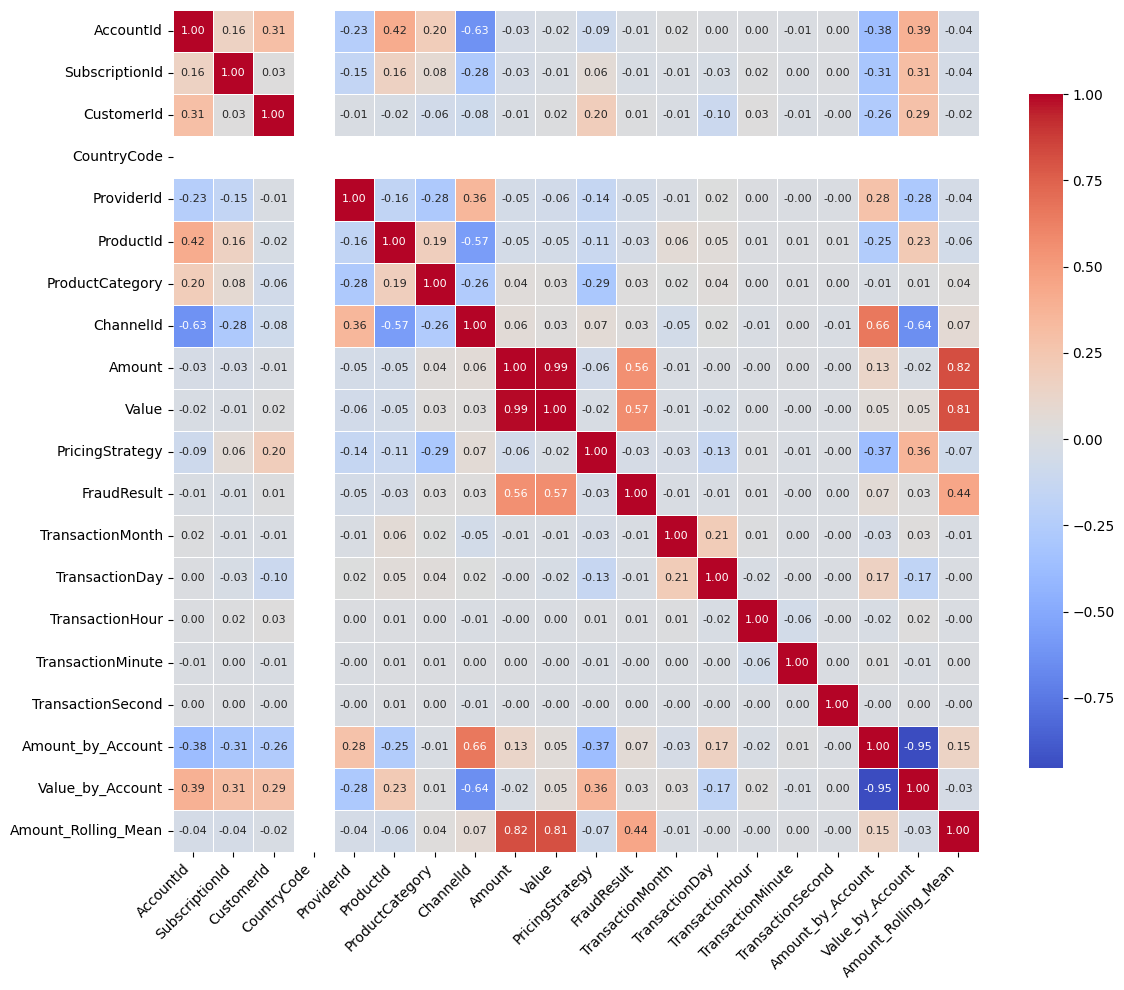

In [ ]:
# Selecting only numeric variables
numeric_df = df.select_dtypes(include=['number'])

# Increase figure size for better readability
plt.figure(figsize=(12, 10))

# Create the heatmap with adjustments
sns.heatmap(numeric_df.corr(),
            cmap='coolwarm',
            annot=True,
            fmt=".2f",  # Format annotations to 2 decimal places
            annot_kws={'size': 8},  # Reduce annotation font size
            linewidths=0.5,  # Add lines between cells for better separation
            cbar_kws={"shrink": .8})  # Reduce colorbar size slightly

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Display the plot
plt.show()

- **Information Value (IV)**:
  - IV measures the predictive power of a feature in relation to a binary target variable. It quantifies how well a feature separates the classes (e.g., default vs. non-default).
  - IV is calculated based on the distribution of the feature values across the target classes and is particularly useful for binary classification problems.

- **Correlation**:
  - Correlation measures the strength and direction of a linear relationship between two continuous variables. It quantifies how changes in one variable are associated with changes in another.
  - The most common measure is Pearson's correlation coefficient, which ranges from -1 to +1.

## WOE Transformation

### 1. With NANs

## Overview of ScorecardPy

**ScorecardPy** is a Python library designed for building credit scoring models. It provides tools and functions to help data scientists and analysts create, validate, and deploy scorecards, particularly in the context of binary classification problems, such as predicting loan defaults or credit risk.

### Key Features

1. **Binning**:
   - Automatically bins continuous variables into categories, which helps in transforming numerical data into a format suitable for scorecard modeling.

2. **WoE (Weight of Evidence) Transformation**:
   - Converts binned variables into Weight of Evidence, which is a common transformation used in credit scoring to quantify the predictive power of each category.

3. **Scorecard Development**:
   - Facilitates the creation of a scorecard by allowing users to define points for each feature based on their predictive power and importance.

4. **Model Evaluation**:
   - Provides tools for evaluating the performance of the scorecard through metrics such as KS statistics, AUC (Area Under the Curve), and confusion matrices.

5. **Visualization**:
   - Includes functions for visualizing the distribution of variables, the relationship between features and the target variable, and the overall performance of the scorecard.

6. **Integration**:
   - Can be easily integrated into existing data science workflows and can work with pandas DataFrames, making it user-friendly for those familiar with Python and data manipulation.

### Use Cases

- **Credit Risk Assessment**: Building models to evaluate the creditworthiness of applicants.
- **Fraud Detection**: Identifying potentially fraudulent transactions or behaviors.
- **Customer Segmentation**: Analyzing customer data to inform marketing strategies or product offerings.


In [ ]:
!pip install scorecardpy
!pip install monotonic-binning
import scorecardpy as sc
from monotonic_binning.monotonic_woe_binning import Binning

In [ ]:
# reload data

df = pd.read_csv('https://drive.google.com/uc?id=1d-Zs0gl5nVptGC578KSp1L2ooyxUmh1M')

#### a) Train / Test split

In [ ]:
# Perform a 70 / 30 split of data
train, test = sc.split_df(df, 'FraudResult', ratio = 0.7, seed = 999).values()

\#### b) Compute monotonic WOEs - Numeric Variables

In [ ]:
var = train.drop(['FraudResult', 'Value', 'Amount'], axis = 1).columns
y_var = train['FraudResult']

def woe_num(x, y):
  bin_object = Binning(y, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
  global breaks
  breaks = {}
  for i in x:
    bin_object.fit(train[[y, i]])
    breaks[i] = (bin_object.bins[1:-1].tolist())
  return breaks

### Binning Parameters Explanation

The `Binning` class is utilized to segment numeric variables into bins based on specific criteria:

- **`n_threshold=50`**: This parameter sets the minimum number of unique values required in a variable to consider it for binning.
- **`y_threshold=10`**: This specifies the minimum count of observations that must be present in each bin to ensure statistical significance.
- **`p_threshold=0.35`**: This threshold determines the acceptable proportion of good versus bad loans within the bins, aiding in the identification of meaningful segments.

These parameters help create robust bins for effective Weight of Evidence (WoE) calculations, enhancing predictive modeling.


In [ ]:
import numpy as np
import pandas as pd
from monotonic_binning.monotonic_woe_binning import Binning

var = train.drop(['FraudResult', 'Value', 'Amount'], axis=1).columns
y_var = train['FraudResult']


def woe_num(x, y):
    bin_object = Binning(
        y, n_threshold=50, y_threshold=10, p_threshold=0.35, sign=False
    )
    global breaks
    breaks = {}
    for i in x:
        # Convert the column to numeric, handling errors
        train[i] = pd.to_numeric(train[i], errors="coerce")
        # Remove infinite values
        train[i] = train[i][np.isfinite(train[i])]

        bin_object.fit(train[[y, i]])
        breaks[i] = bin_object.bins[1:-1].tolist()
    return breaks

#### c) Categorical variables

#### d) Merge numeric and categorical variables breaks

In [ ]:
# Define breaks_list directly in the code
breaks_list = {

    'ProductCategory': ['airtime', 'data bundles', 'financial services', 'movies', 'retail', 'tv', 'utility bills'],
    'ChannelId': ['android', 'checkout', 'ios', 'pay later', 'web']
}



In [ ]:

print(breaks)

{}


#### e) Compute WOEs

In [ ]:
bins_adj = sc.woebin(df, 'FraudResult', breaks_list= breaks, positive = 'bad|0') # change positive to adjust WOE to ln(GOOD / BAD)

[INFO] creating woe binning ...
>>> There are 6 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
TransactionId, BatchId, AccountId, SubscriptionId, CustomerId, TransactionStartTime
>>> Continue the binning process?
1: yes 
2: no


In [ ]:
sc.woebin_plot(bins_adj)

#### f) Apply transformations to df

In [ ]:
# converting train and test into woe values
train_woe = sc.woebin_ply(train, bins_adj)
test_woe = sc.woebin_ply(test, bins_adj)

#### g) Merge original variables with WOEs

In this case, we will merge by index because we don't have any ID.

In [ ]:
# Merge by index
train_final = train.merge(train_woe, how = 'left', left_index=True, right_index=True)
test_final = test.merge(test_woe, how = 'left', left_index=True, right_index=True)

In [ ]:
train_final.head(10)

# Merging Datasets with Weight of Evidence (WoE)

In this section, we merge the original training and

*   testing datasets with their respective Weight of Evidence (WoE) transformed datasets to enhance the predictive power of our logistic regression model.
*   Merging the original dataset with the WoE transformed dataset provides valuable insights into the predictive relationships of features, improving the performance of our logistic regression model for tasks such as predicting loan defaults.





In [ ]:
train_final = train_final.drop(columns = 'BAD_y').rename(columns={'BAD_x':'vd'})
test_final = test_final.drop(columns = 'BAD_y').rename(columns={'BAD_x':'vd'})